In [1]:
import vist
import matplotlib.pyplot as plt
from datetime import datetime
from pprint import pprint
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)

### Load Story-in-Sequence Instance

In [2]:
vist_images_dir = '/playpen/data/vist/images'
vist_annotations_dir = '/Users/tonyhong/ROOT/coli/SIND/data'
sis = vist.Story_in_Sequence(vist_images_dir, vist_annotations_dir)

sis's [train] loaded. It took 6.28 seconds.
sis's [val] loaded. It took 0.89 seconds.
sis's [test] loaded. It took 0.83 seconds.
Make mapping ...
Mapping for [Albums][Images][Stories][Sents] done.


### Let's check one album.

In [3]:
album_id = sis.Albums.keys()[0]
# sis.show_album(album_id)
album = sis.Albums[album_id]
pprint(album)

{u'date_create': u'221543',
 u'date_update': u'1322851072',
 u'description': u"Not only is that an awesome name for a band, but it's also a dream come true!\n\nEver since Tom Hanks in &quot;Big&quot; I've always wanted to find some creeped out abandoned amusement park. Now I have, and on my birthday, no less. I've died and gone to heaven. =o]",
 u'farm': u'1',
 u'id': u'221543',
 'img_ids': [u'8605942',
             u'8605855',
             u'8605810',
             u'8605754',
             u'8605649',
             u'8605552',
             u'8605479',
             u'8605411',
             u'8605354',
             u'8605232',
             u'8605170',
             u'8605117',
             u'8605070',
             u'8605009'],
 u'owner': u'51035603349@N01',
 u'photos': u'14',
 u'primary': u'8605942',
 u'secret': u'6e7db22851',
 u'server': u'8',
 'split': 'train',
 'story_ids': [u'3024', u'3023', u'3022', u'3021', u'3020'],
 u'title': u'Leftsider & the Abandoned Carnival',
 u'vist_label': u

### Check its story

In [4]:
story_ids = sis.Albums[album_id]['story_ids']
story_id = story_ids[0]
# sis.show_story(story_id)
print sis.Stories[story_id]['img_ids']

[u'8605942', u'8605855', u'8605354', u'8605170', u'8605117']


## Here are some stats about SIS dataset.

In [5]:
# albums stats
split_to_album_ids = {'train': [], 'val': [], 'test': []}
total_albums = 0
for split in ['train', 'val', 'test']:
    split_to_album_ids[split] = [album_id for album_id, album in sis.Albums.items() if album['split'] == split]
    print 'There are [%s] albums in [%s] split.' % (len(split_to_album_ids[split]), split)
    total_albums += len(split_to_album_ids[split])
print 'In total, there are [%s] albums.' % total_albums

There are [8031] albums in [train] split.
There are [998] albums in [val] split.
There are [1011] albums in [test] split.
In total, there are [10040] albums.


In [6]:
# stories stats
split_to_story_ids = {'train': [], 'val': [], 'test': []}
for story in sis.stories:
    album_id = story['album_id']
    split = sis.Albums[album_id]['split']
    split_to_story_ids[split] += [story['id']]
total_stories = 0
for split in ['train', 'val', 'test']:
    print 'There are [%s] stories in [%s] split.' % (len(split_to_story_ids[split]), split)
    total_stories += len(split_to_story_ids[split])
print 'In total, there are [%s] stories.' % (total_stories)

There are [40155] stories in [train] split.
There are [4990] stories in [val] split.
There are [5055] stories in [test] split.
In total, there are [50200] stories.


In [7]:
# sents stats
print 'SIS:'
split_to_sent_ids = {'train': [], 'val': [], 'test': []}
for sent in sis.sents:
    album_id = sent['album_id']
    split = sis.Albums[album_id]['split']
    split_to_sent_ids[split] += [sent['id']]
total_sents = 0
for split in ['train', 'val', 'test']:
    print 'There are [%s] sents in [%s] split.' % (len(split_to_sent_ids[split]), split)
    total_sents += len(split_to_sent_ids[split])
print 'In total, there are [%s] sents.' % (total_sents)

SIS:
There are [200775] sents in [train] split.
There are [24950] sents in [val] split.
There are [25275] sents in [test] split.
In total, there are [251000] sents.


In [8]:
# check story order
def check_dts_order(dts):
    flag = True
    for i in range(1, len(dts)):
        if dts[i] <= dts[i-1]:
            flag = False
    return flag

inorder = 0
for story in sis.stories:
    dts = []
    for i, sent_id in enumerate(story['sent_ids']):
        sent = sis.Sents[sent_id]
        assert sent['order'] == i
        img = sis.Images[sent['img_id']]
        dt = datetime.strptime(img['datetaken'], '%Y-%m-%d %H:%M:%S')
        dts += [dt]
    if check_dts_order(dts):
        inorder += 1
print 'Among %s stories, %s [%.2f%%] are in order' % (len(sis.stories), inorder, inorder*100.0/len(sis.stories))

Among 50200 stories, 31481 [62.71%] are in order


In [9]:
# img_ids = sis.Stories[story_id]['img_ids']
# dii.show_imgs_with_sents(img_ids, False)

In [10]:
# Load DII instance
dii = vist.Description_in_Isolation(vist_images_dir, vist_annotations_dir)

# DII's sents stats
print 'DII:'
dii_split_to_sent_ids = {'train': [], 'val': [], 'test': []}
for sent in dii.sents:
    album_id = sent['album_id']
    split = dii.Albums[album_id]['split']
    dii_split_to_sent_ids[split] += [sent['id']]
total_sents = 0
for split in ['train', 'val', 'test']:
    print 'There are [%s] sents in [%s] split.' % (len(dii_split_to_sent_ids[split]), split)
    total_sents += len(dii_split_to_sent_ids[split])
print 'In total, there are [%s] sents.' % (total_sents)

dii's [train] loaded. It took 8.69 seconds.
dii's [val] loaded. It took 0.65 seconds.
dii's [test] loaded. It took 0.47 seconds.
Make mapping ...
Mapping for [Albums][Images][Sents] done.
DII:
There are [120465] sents in [train] split.
There are [14970] sents in [val] split.
There are [15165] sents in [test] split.
In total, there are [150600] sents.


In [14]:
import matplotlib.pyplot as plt

In [15]:
X = ['train', 'val', 'test']
Y = [120465, 14970, 15165]

<BarContainer object of 3 artists>

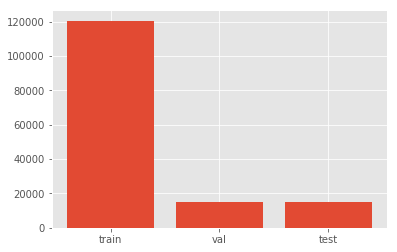

In [26]:
plt.style.use('ggplot')
plt.bar(X, Y)